In [2]:
import pandas as pd
import numpy as np

In [3]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [4]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
                , low_memory=False)

In [5]:
df.head(3)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N


# Understanding the dataset 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [7]:
df.shape

(194673, 38)

In [8]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


# Data Wrangling

**Observation** :
This does not give us much, so have to reduce it to the smaller dataset and start exploring

In [9]:
# Creating a targeted dataset with colums:
# 'ROADCOND', 'WEATHER', 'LIGHTCOND', 'UNDERINFL', 'SEVERITYCODE', new: 'Accident'

df_target = df[['ROADCOND', 'WEATHER', 'LIGHTCOND', 'SEVERITYCODE']]
print(df_target.dtypes)
df_target.info()

# 


ROADCOND        object
WEATHER         object
LIGHTCOND       object
SEVERITYCODE     int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ROADCOND      189661 non-null  object
 1   WEATHER       189592 non-null  object
 2   LIGHTCOND     189503 non-null  object
 3   SEVERITYCODE  194673 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.9+ MB


In [10]:
# function to check column values
def print_value_counts(df):
    columns = list(df)
    for column in columns:
        print("**Value counts**: \n" + str(df[column].value_counts()), end='\n\n')

In [11]:
# function to check and print nulls
def check_nulls(df):
    columns = list(df)
    for column in columns:
        print(str(column) + " null count: " + str(df[column].isnull().sum()), end='\n')

In [12]:
def convert_serverity_binary():
    df1 = pd.DataFrame(df_complete_target["SEVERITYCODE"])

    all_cats = [1, 2]
    cat_codes = ['0', '1']

    df2 = pd.DataFrame({'all_cats':all_cats, 'cat_codes':cat_codes})

    rename_dict = df2.set_index('all_cats').to_dict()['cat_codes']

    df1 = df1.replace(rename_dict)
    
    df_target["SEVERITYCODE"] = df1["SEVERITYCODE"]

In [13]:
print_value_counts(df_target)

**Value counts**: 
Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

**Value counts**: 
Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

**Value counts**: 
Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                        

In [14]:
# convert_serverity_binary()

In [15]:
# filter for only complete rows

df_complete_target = df_target.loc[
      ((df['ROADCOND']!= 'Unknown')&(df['ROADCOND']!= 'Other'))
    & ((df['WEATHER']!='Unknown')&(df['WEATHER']!= 'Other'))
    & ((df['LIGHTCOND']!='Unknown')&(df['LIGHTCOND']!= 'Other') & (df['LIGHTCOND'] != 'Dark - Unknown Lighting'))
]
# df_complete_target = df_complete_target.loc[df['WEATHER']!='Unknown']
# df_complete_target = df_complete_target.loc[df['LIGHTCOND']!='Unknown']
df_complete_target.head()

,ROADCOND,WEATHER,LIGHTCOND,SEVERITYCODE
0,Wet,Overcast,Daylight,2
1,Wet,Raining,Dark - Street Lights On,1
2,Dry,Overcast,Daylight,1
3,Dry,Clear,Daylight,1
4,Wet,Raining,Daylight,2


In [16]:
# checking the column's values of new dataset
print_value_counts(df_complete_target)

**Value counts**: 
Dry               121689
Wet                46373
Ice                 1083
Snow/Slush           837
Standing Water       105
Sand/Mud/Dirt         66
Oil                   60
Name: ROADCOND, dtype: int64

**Value counts**: 
Clear                       108948
Raining                      32672
Overcast                     26953
Snowing                        831
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       107
Blowing Sand/Dirt               47
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

**Value counts**: 
Daylight                    112673
Dark - Street Lights On      46813
Dusk                          5661
Dawn                          2413
Dark - No Street Lights       1409
Dark - Street Lights Off      1120
Name: LIGHTCOND, dtype: int64

**Value counts**: 
1    118396
2     56812
Name: SEVERITYCODE, dtype: int64



In [27]:
check_nulls(df_complete_target)

ROADCOND null count: 0
WEATHER null count: 0
LIGHTCOND null count: 0
SEVERITYCODE null count: 0


In [28]:
# drop NaN cells 

df_complete_target.dropna(inplace=True)
check_nulls(df_complete_target)
print_value_counts(df_complete_target)
df_complete_target.shape

C:\Users\romas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ROADCOND null count: 0
WEATHER null count: 0
LIGHTCOND null count: 0
SEVERITYCODE null count: 0
**Value counts**: 
Dry               121487
Wet                46319
Ice                 1080
Snow/Slush           833
Standing Water       105
Sand/Mud/Dirt         65
Oil                   60
Name: ROADCOND, dtype: int64

**Value counts**: 
Clear                       108822
Raining                      32644
Overcast                     26922
Snowing                        825
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       107
Blowing Sand/Dirt               46
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

**Value counts**: 
Daylight                    112618
Dark - Street Lights On      46748
Dusk                          5648
Dawn                          2413
Dark - No Street Lights       1408
Dark - Street Lights Off      1114
Name: LIGHTCOND, dtype: int64

**Value counts**: 
1    114269
2     55680
Name: SEVERITY

(169949, 4)

In [29]:
# standardize UNDERINFL column

# df_complete_target.loc[df_complete_target['UNDERINFL'] == 'No', 'UNDERINFL'] = 0
# print_value_counts(df_complete_target)

# Simple Visualizations

In [30]:
# Importing Seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='ROADCOND'>

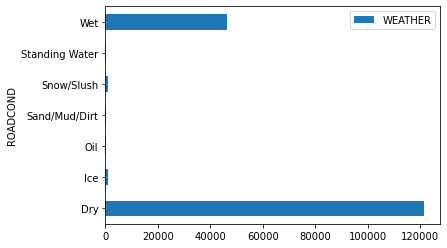

In [31]:
# Bar graph: Road Condition count
df_road_vs_weather = df_complete_target.groupby('ROADCOND', axis=0).count()
df_road_vs_weather.loc[:,['WEATHER']].plot(kind='barh')

<AxesSubplot:xlabel='SEVERITYCODE'>

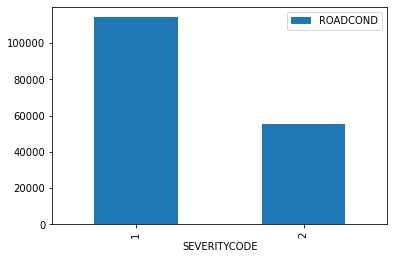

In [32]:
# Bar graph: Severity count
df_severity = df_complete_target.groupby('SEVERITYCODE', axis=0).count()
df_severity.loc[:,['ROADCOND']].plot(kind='bar')

<AxesSubplot:xlabel='WEATHER'>

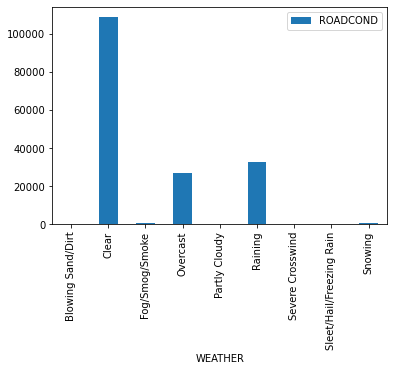

In [33]:
# Bar graph: Weather count
df_weather = df_complete_target.groupby('WEATHER', axis=0).count()
df_weather.loc[:,['ROADCOND']].plot(kind='bar')

<AxesSubplot:xlabel='LIGHTCOND'>

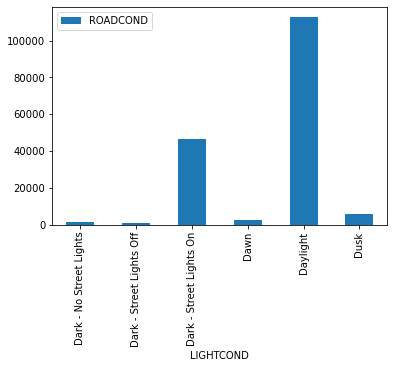

In [34]:
# Bar graph: Lighting Conditions count
df_weather = df_complete_target.groupby('LIGHTCOND', axis=0).count()
df_weather.loc[:,['ROADCOND']].plot(kind='bar')

# Model Building

deciding on the ML algorithm

1. all of our data is categoriacal 
2. need to predict a group a class of severity

conclusion: use **classification**

options:

1. k-means
2. decision trees
3. Logistic regression

## Preprocessing

In [35]:
# independent variables
X = df_complete_target[['ROADCOND', 'WEATHER', 'LIGHTCOND']].values

In [36]:
#target variable
y = df_complete_target['SEVERITYCODE']

In [37]:
from sklearn import preprocessing

# using LabelEncoder instead of get dummies to get create the numerical columns
le_rcond = preprocessing.LabelEncoder()
le_rcond.fit([
      'Dry'
    , 'Wet'
    , 'Ice'
    , 'Snow/Slush'
    , 'Standing Water'
    , 'Sand/Mud/Dirt'
    , 'Oil'
])
X[:,0] = le_rcond.transform(X[:,0])

le_weather = preprocessing.LabelEncoder()
le_weather.fit([
      'Clear'
    , 'Raining'
    , 'Overcast'
    , 'Snowing'
    , 'Fog/Smog/Smoke'
    , 'Sleet/Hail/Freezing Rain'
    , 'Blowing Sand/Dirt'
    , 'Severe Crosswind'
    , 'Partly Cloudy'
])
X[:,1] = le_weather.transform(X[:,1])

le_weather = preprocessing.LabelEncoder()
le_weather.fit([
      'Daylight'
    , 'Dark - Street Lights On'
    , 'Dusk'
    , 'Dawn'
    , 'Dark - No Street Lights'
    , 'Dark - Street Lights Off'

])
X[:,2] = le_weather.transform(X[:,2])

In [38]:
# using test_train_split with size of 30%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3) #

In [39]:
# checking
print(X_train.shape)
print(X_test.shape)
print('---')
print(y_train.shape)
print(y_test.shape)

(118964, 3)
(50985, 3)
---
(118964,)
(50985,)


## Decision Tree

### Modelling

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
# Creating a decision tree object
trainTree = DecisionTreeClassifier(criterion="entropy", max_depth=4) #max_depth

In [42]:
# training
trainTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Prediction

In [43]:
predictionTree = trainTree.predict(X_test)

In [44]:
print(predictionTree[0:5])
print(y_test[0:5].values)

[1 1 1 1 1]
[2 2 2 1 1]


### Evaluation

In [45]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [46]:
# using accuracy score
print("Accuracy: ", metrics.accuracy_score(y_test, predictionTree))

Accuracy:  0.6728645680101991


In [47]:
# using cross validation
Rcross = cross_val_score(trainTree, X, y, cv=4)
Rcross

array([0.67237808, 0.67239391, 0.67234684, 0.67234684])

**Observation**: running two test scores, the accuracy of this decision tree is approximately 0.67, which hardly can be called satisfying. New methods should be explored.

### Visualization

In [48]:
# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

In [49]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

C:\Users\romas\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [50]:
# dot_data = StringIO()
# filename = "severitytree.png"
# featureNames = df_complete_target.columns[0:3]
# targetNames = df_complete_target["SEVERITYCODE"].unique().tolist()
# out=tree.export_graphviz(trainTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png(filename)
# img = mpimg.imread(filename)
# plt.figure(figsize=(100, 200))
# plt.imshow(img,interpolation='nearest')

## Logistic Regression

Since we have only two values for severity, we are able to use logistic regression to predict the severity outcome

In [51]:
# reusing the same X and y
print(X[0:5])
print(y[0:5])

[[6 3 4]
 [6 5 2]
 [0 3 4]
 [0 1 4]
 [6 5 4]]
0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64


In [52]:
# normalizing the dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.62182373,  0.53092809,  0.58440302],
       [ 1.62182373,  1.74686053, -1.41728406],
       [-0.62352733,  0.53092809,  0.58440302],
       [-0.62352733, -0.68500435,  0.58440302],
       [ 1.62182373,  1.74686053,  0.58440302]])

In [53]:
# imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [54]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
prediction = lr.predict(X_test)
prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [62]:
lr_result = pd.DataFrame(prediction)
# lr_result.columns.rename({0: "Severity"})
# lr_result.set_index(0, inplace=True)
# lr_result.groupby(0).sum()

In [63]:
print("KNN accuracy (train): ", metrics.accuracy_score(y_train, X_train))
print("KNN accuracy (TEST): ", metrics.accuracy_score(y_test, prediction))

ValueError: Classification metrics can't handle a mix of binary and unknown targets

**Observation**: logistic regression predicts only values of 1

## KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [49]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [50]:
print("KNN accuracy (train): ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("KNN accuracy (TEST): ", metrics.accuracy_score(y_test, yhat))

KNN accuracy (train):  0.6370498638243502
KNN accuracy (TEST):  0.6371285672256546


In [ ]:
conclusion: KNN does not really work, especially have to consider KNN probably 